# Neural Networks

In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Loading and visualizing data

In [2]:
# load training data

data = scipy.io.loadmat('ex3data1.mat')
X = data['X']

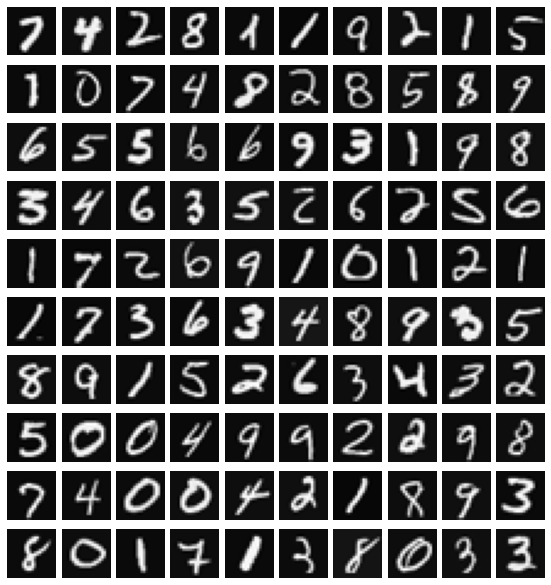

In [4]:
# randomly select 100 data points to display

index = np.random.choice(5000, 100)

# create a image data matrix for the 100 selected data points

img = np.zeros((10,10,20,20))
ind = np.arange(100)

for i in range(100):
    row, col = i // 10, i % 10
    img[row, col, :, :] = X[index[i],:].reshape(20,20, order='F')

# data visualization

fig, axs = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        # axs[i, j].imshow(img[i,j,:,:])
        axs[i, j].imshow(img[i,j,:,:], cmap='gray')
        axs[i, j].axis('off')
        fig.subplots_adjust(wspace = -0.9)
        fig.set_size_inches(18.5, 10.5)

## Predict

In [5]:
# load the weights into variables Theta1 and Theta2

weight = scipy.io.loadmat('ex3weights.mat')

Theta1 = weight['Theta1']
Theta2 = weight['Theta2']

# add one column with 1's to X 

col_ones = np.ones(len(X)).reshape(-1,1)
X_with_ones = np.concatenate((col_ones, X), axis=1)

# sigmoid function

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# predict function

a2 = sigmoid(np.dot(X_with_ones, np.transpose(Theta1)))
a2_with_ones = np.concatenate((col_ones, a2), axis=1)
a3 = sigmoid(np.dot(a2_with_ones, np.transpose(Theta2)))

def predict(ind):
    result = np.argmax(a3[ind], axis=0)+1
    probability = max(a3[ind]).round(3)
    if result == 10:
        return [0, probability]
    else:
        return [result, probability]

Neural Network Prediction: 3, with the probability 98.9%


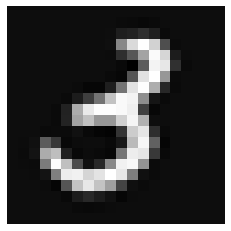

In [9]:
# Run through the examples one at a time to see what is predicting.

rp = np.random.choice(5000)

img = X[rp,:].reshape(20,20, order='F')
plt.imshow(img, cmap='gray')
plt.axis('off')

print(f'Neural Network Prediction: {predict(rp)[0]}, with the probability {100*predict(rp)[1]}%')